# Heart Risk Classifier
# Классификатор сердечного риска

**Это проект по созданию модели логистической регрессии для предсказания наличия сердечных заболеваний у пациентов на основе их физических характеристик**



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

В базе данных содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень инвазивный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих инвазивных процедур.

Содержимое

Информация об атрибутах:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца

Источник: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Проверка пропущенных значений
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# В данном случае (как указано в документе) пропусков нет.

In [7]:
df['target'].unique()

array([1, 0], dtype=int64)

In [8]:
# Статистический отчёт
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
# Проверка уникальных значений для категориальных признаков

In [10]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
print("Уникальные значения категориальных признаков:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

Уникальные значения категориальных признаков:
sex: [1 0]
cp: [3 2 1 0]
fbs: [1 0]
restecg: [0 1 2]
exang: [0 1]
slope: [0 2 1]
ca: [0 2 1 3 4]
thal: [1 2 3 0]
target: [1 0]


In [12]:
# Видно что thal на самом деле thal равен 0, 1, 2 или 3, а ca (0-4).

In [13]:
# Проверяем, насколько сбалансированы классы (0 и 1)
# Ожидаемый вывод: ~ 54.46% для класса 1 и ~ 45.54% для класса 0 (сбалансировано)

print("Распределение классов в target:")
df['target'].value_counts(normalize=True)

Распределение классов в target:


1    0.544554
0    0.455446
Name: target, dtype: float64

In [14]:
# Распределение числовых признаков

In [15]:
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

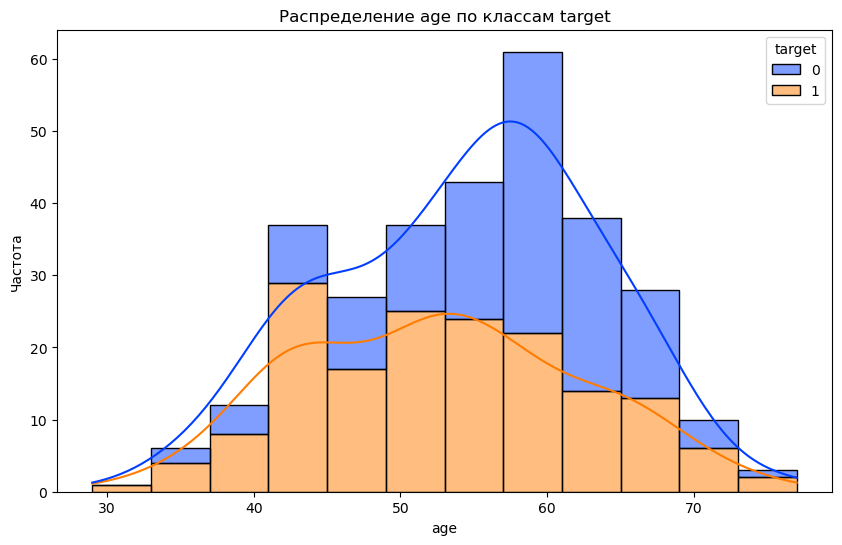

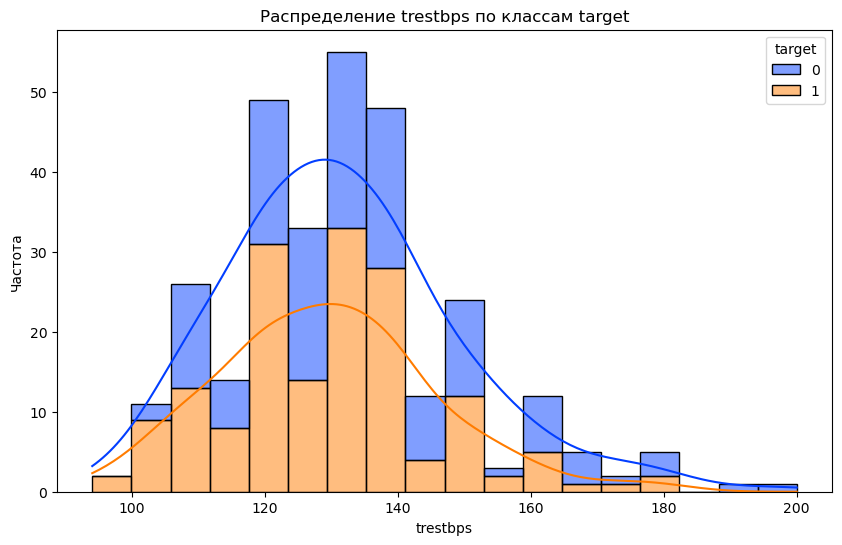

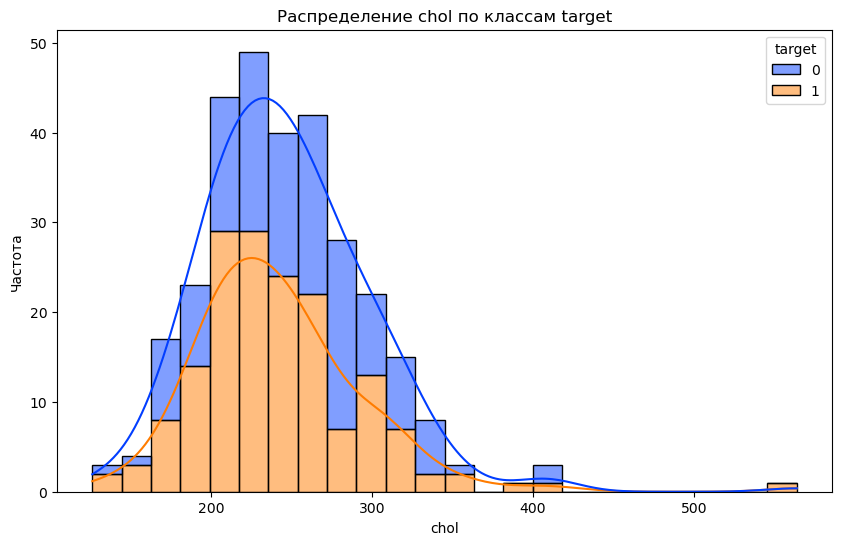

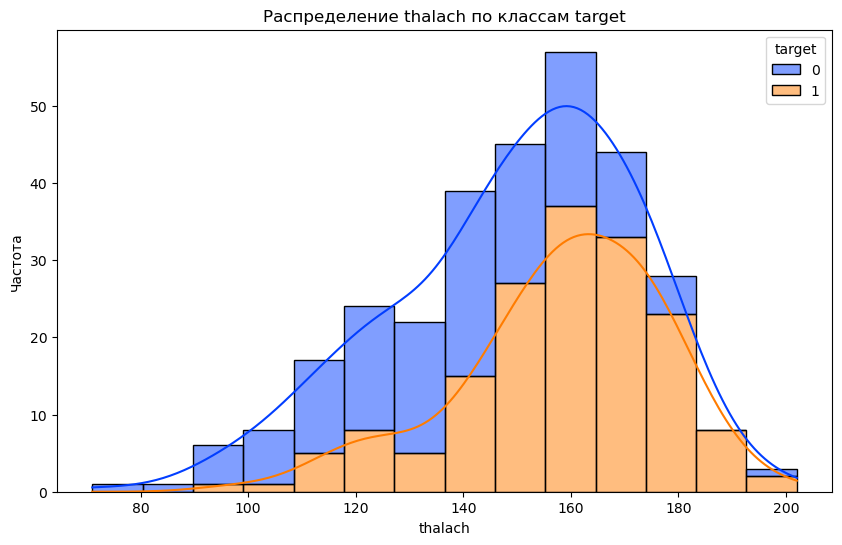

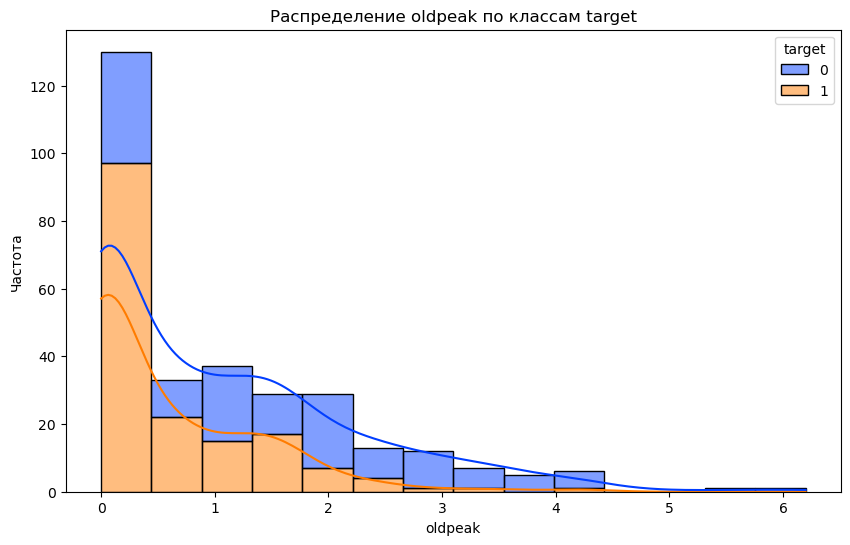

In [16]:
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True, hue='target', multiple='stack', palette='bright')
    plt.title(f'Распределение {col} по классам target')
    plt.xlabel(col)
    plt.ylabel('Частота')

In [17]:
# Боксплоты для числовых признаков

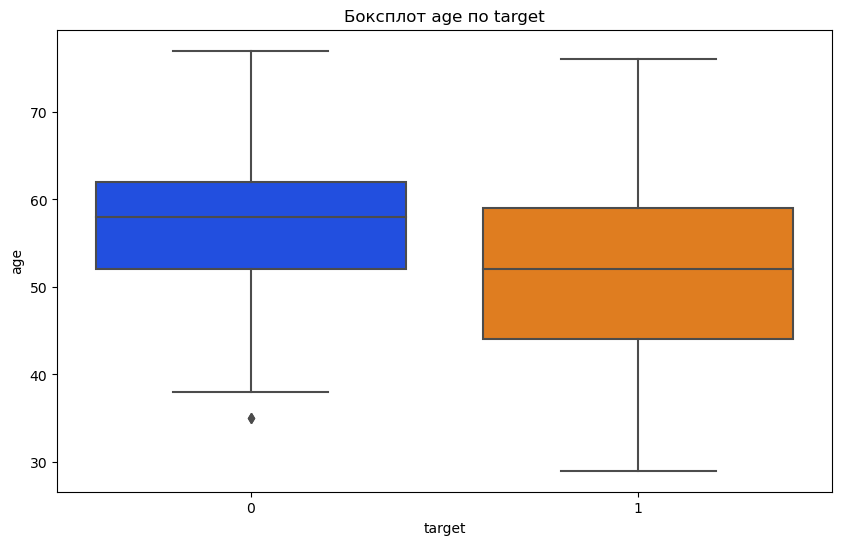

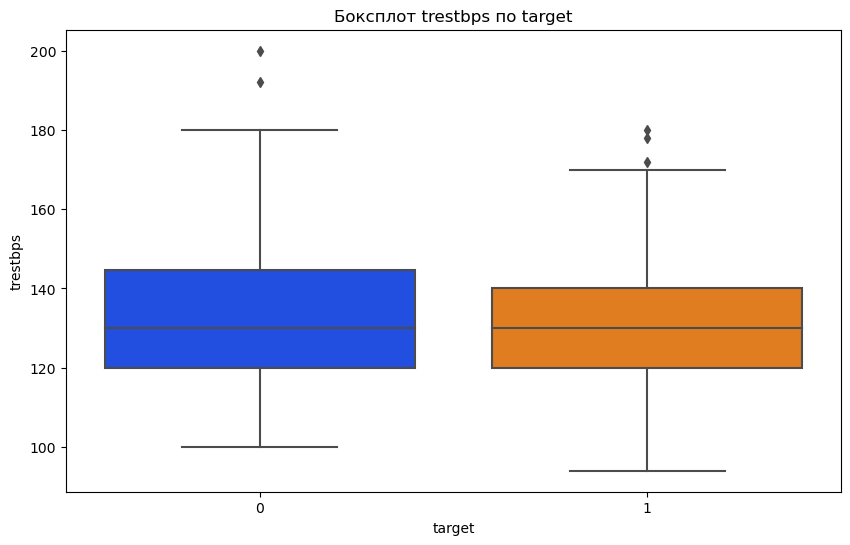

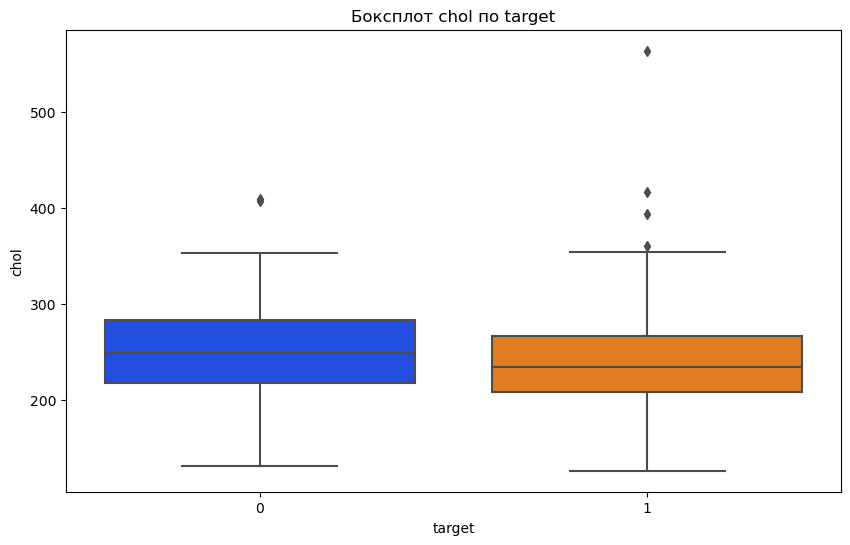

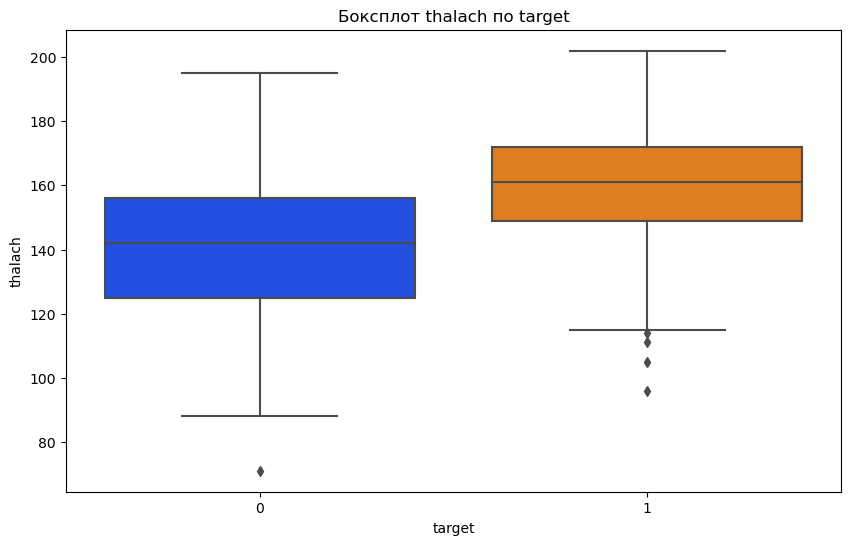

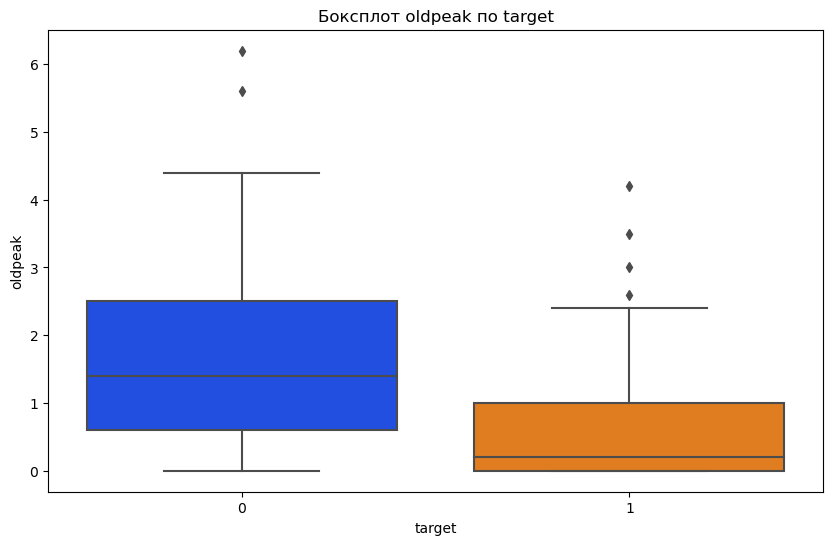

In [18]:
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    
    sns.boxplot(data=df, x='target', y=col, palette='bright')
    plt.title(f'Боксплот {col} по target')
    
    plt.xlabel('target')
    plt.ylabel(col)
    

In [19]:
# Видно что:
# 1) Пациенты с заболеванием (1) обычно моложе (средний возраст ~52 против ~56 для класса 0), т.е. более молодые пациенты чаще имеют заболевание, а более пожилые — нет. Есть один выброс для класса 0 (возраст ~35 лет), что указывает на редкость молодых пациентов без заболевания, но выбросы минимальны поэтому обработка не критична
# 2) Давление в состоянии покоя (trestbps) не показывает сильного различия между классами. Пики распределений близки. Медиана давления для класса 0 (~130–140 мм рт. ст.) немного выше, чем для класса 1 (~125–135 мм рт. ст.), т.е. у пациентов без заболевания чаще встречаются более высокие значения давления
# 3) Уровень холестерина (chol) не демонстрирует сильного различия между классами, так как распределения очень похожи. Выбросы при значения > 400 мг/дл
# 4) Более высокий пульс ассоциируется с наличием заболевания (медиана для класса 0 (~130–140 ударов/мин) значительно ниже, чем для класса 1 (~150–160 ударов/мин)). Пациенты с заболеванием (класс 1) чаще имеют более высокий максимальный пульс (165), тогда как у класса 0 пульс чаще ниже (160)  
# 5) Низкие значения oldpeak чаще встречаются у класса 0. Это соответствует медицинским данным: меньшая депрессия ST (низкий oldpeak) может быть связана с меньшей выраженностью ишемии у больных в данном контексте


In [20]:
# Категориальные признаки

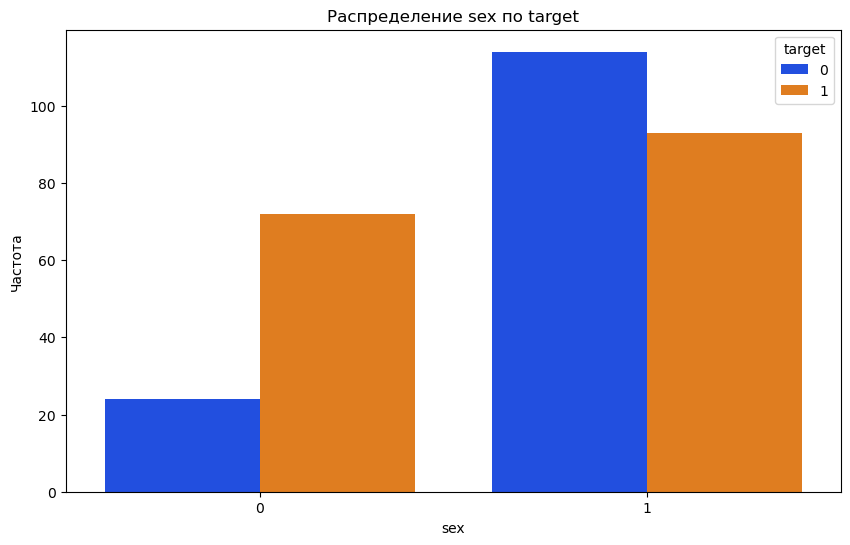

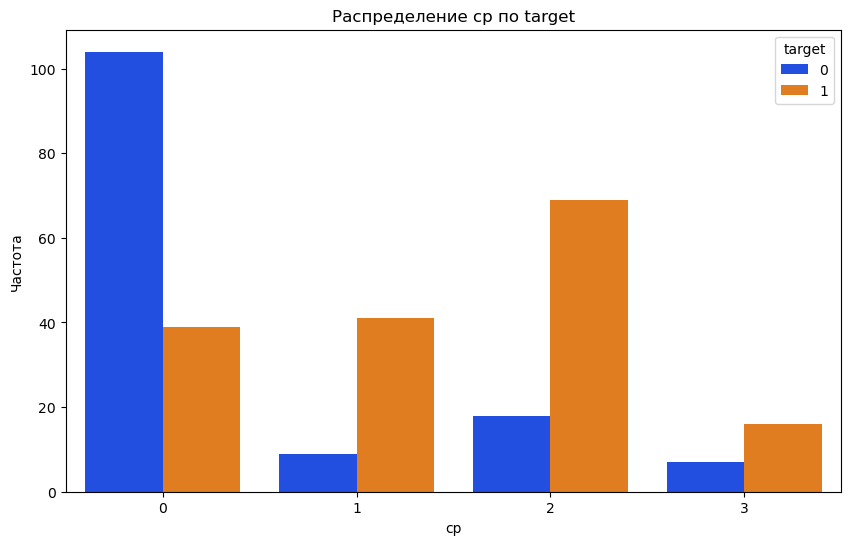

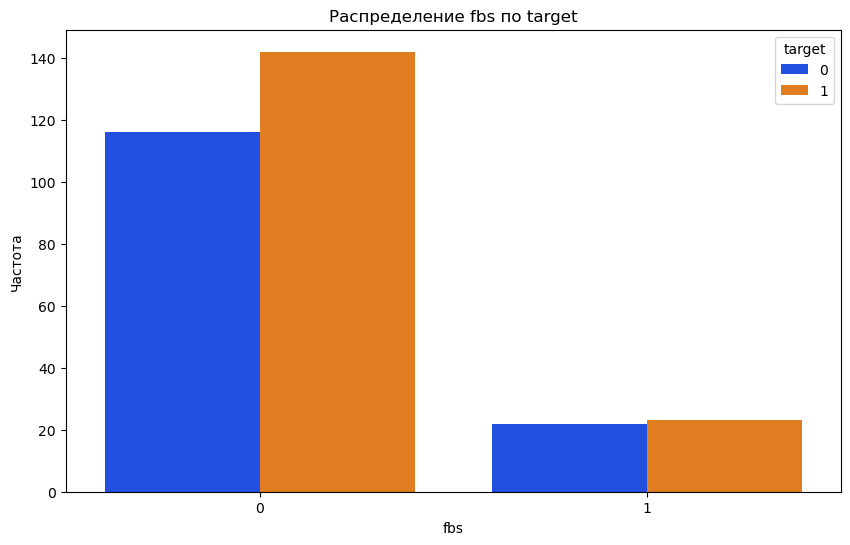

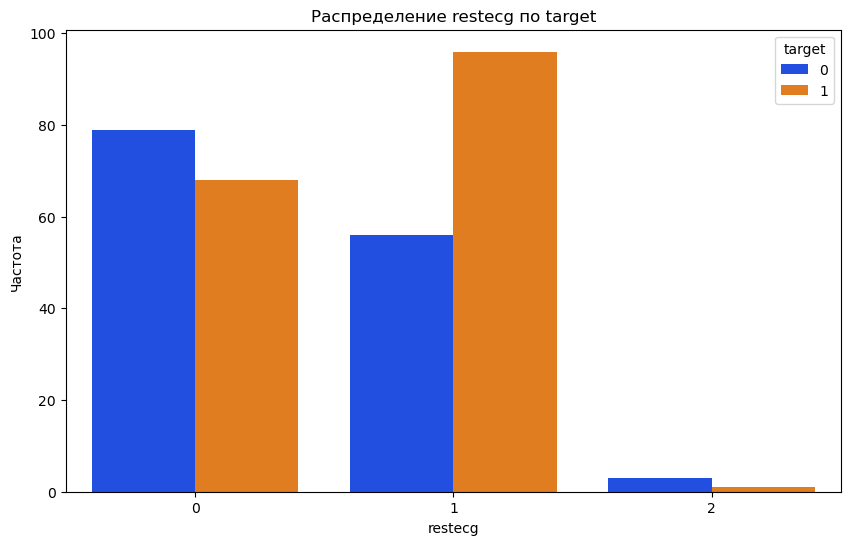

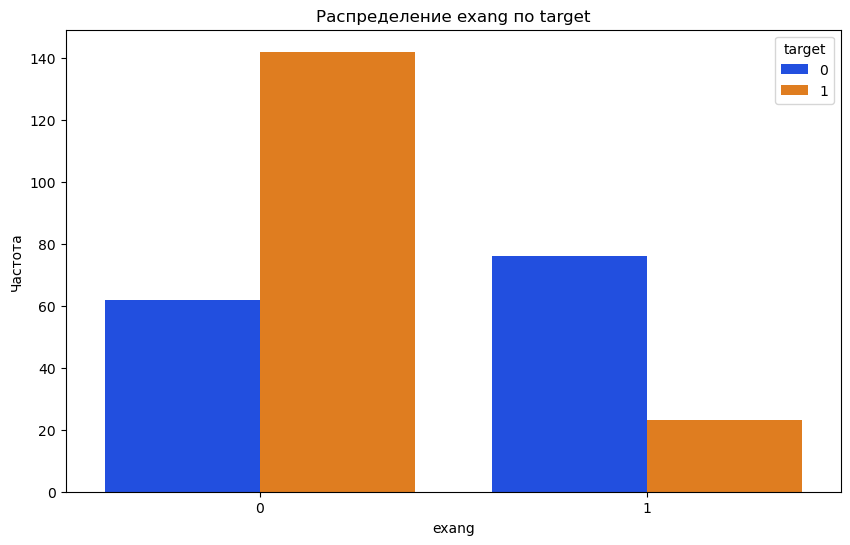

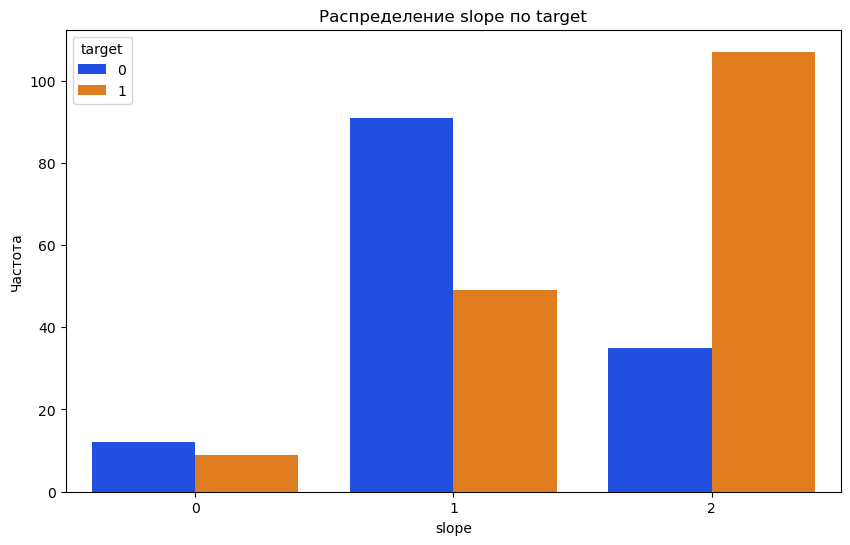

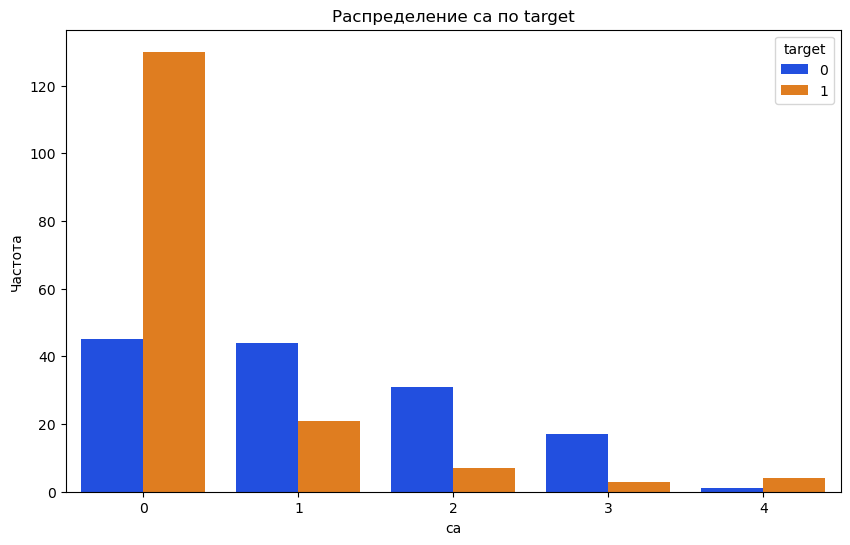

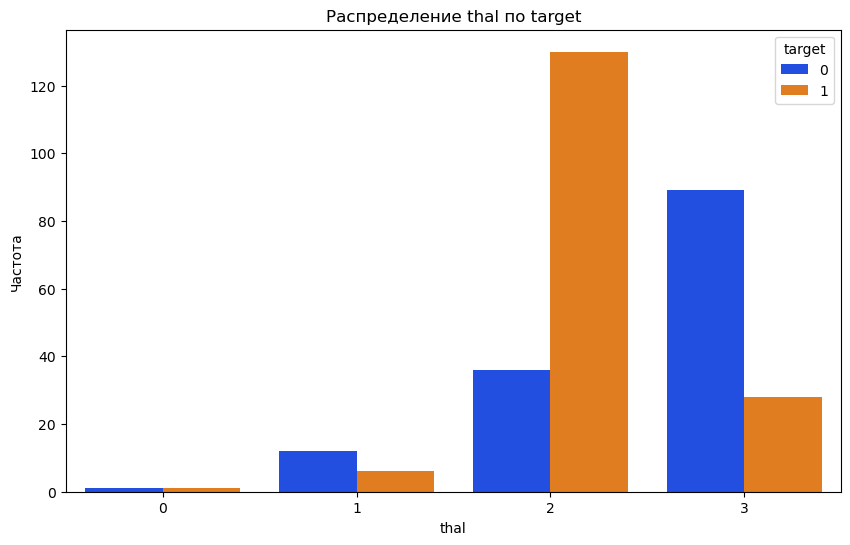

In [21]:
for col in categorical_columns[:-1]:
    plt.figure(figsize=(10, 6))
    
    sns.countplot(data=df, x=col, hue='target', palette='bright')
    plt.title(f'Распределение {col} по target')

    plt.xlabel(col)
    plt.ylabel('Частота')

In [22]:
# 1) Мужчины (sex=1) чаще имеют сердечное заболевание, чем женщины (sex=0)
# 2) Тип боли в груди (cp) сильно коррелирует с наличием заболевания. Начения 1 и 2 ассоциируются с классом 1, а 0 и 3 — с классом 0
# 3) Уровень сахара натощак (fbs) показывает слабое различие. Повышенный уровень (fbs=1) немного чаще встречается у больных
# 4) Распределение результаты электрокардиограммы в покое (restecg). Значение restecg = 1 чаще связано с наличием заболевания (класс 1)
# 5) Наличие стенокардии сильно коррелирует с классом 1 (есть заболевание)
# 6) Значение slope = 2 сильно ассоциируется с наличием заболевания (класс 1)
# 7) Число сосудов (ca = 0, 3, 4) связано с классом 1
# 8) Значение thal = 3 сильно коррелирует с классом 1

In [23]:
# Корреляционная матрица

<Axes: >

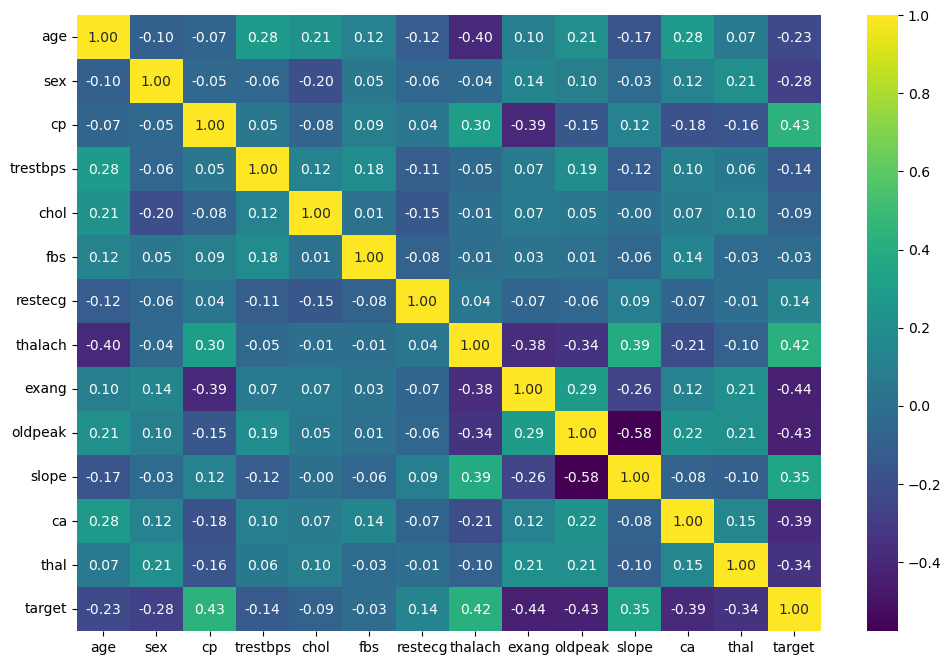

In [24]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')

In [25]:
# Pairplot

Text(0.5, 1.02, 'Pairplot числовых признаков')

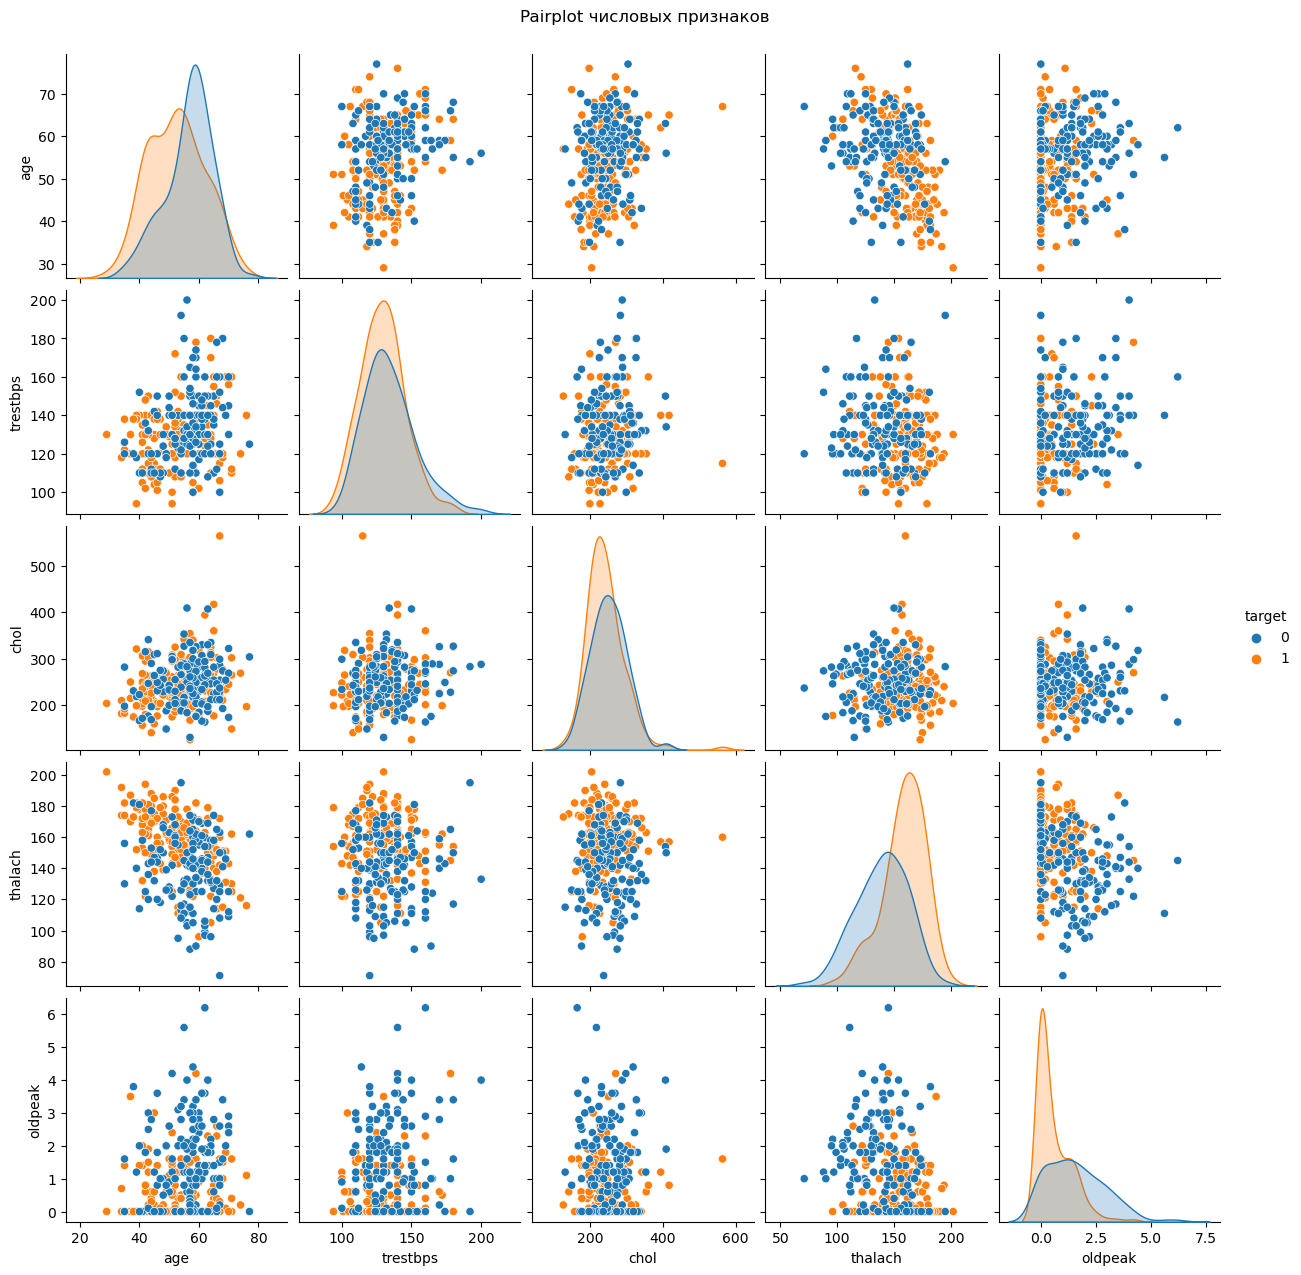

In [26]:
sns.pairplot(df[numeric_columns + ['target']], hue='target', diag_kind='kde')
# sns.pairplot(data=df[['age','trestbps', 'chol','thalach', 'target']], hue='target')
plt.suptitle('Pairplot числовых признаков', y=1.02)

In [27]:
# Значит наиболее значимые признаки для target: thalach, oldpeak, cp, exang из-за сильных корреляций
# Сильной мультиколлинеарности между предикторами нет (коэффициенты < 0.7), что позволяет использовать все признаки без значительного риска переобучения
# Лучше всего заметно по паре thalach и oldpeak что подтверждает их значимость
# Высокий thalach и низкий oldpeak указывают на отсутствие заболевания что может быть связано с лучшей физической выносливостью

In [28]:
# Выбросы

In [29]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1 # межквартильный размах
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    
    return outliers

In [30]:
for col in numeric_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"Выбросы в {col}: {len(outliers)} значений")
    if len(outliers) > 0:
        print(outliers)

Выбросы в age: 0 значений
Выбросы в trestbps: 9 значений
8      172
101    178
110    180
203    180
223    200
241    174
248    192
260    178
266    180
Name: trestbps, dtype: int64
Выбросы в chol: 5 значений
28     417
85     564
96     394
220    407
246    409
Name: chol, dtype: int64
Выбросы в thalach: 1 значений
272    71
Name: thalach, dtype: int64
Выбросы в oldpeak: 5 значений
101    4.2
204    6.2
221    5.6
250    4.2
291    4.4
Name: oldpeak, dtype: float64


In [31]:
# Логистическая регрессия, SVM могут быть искажены из-за выбросов в trestbps, chol и oldpeak

In [32]:
for col in ['trestbps', 'chol', 'oldpeak', 'thalach']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound) # ограничение значений - clipping


# Машинное обучение

## Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных


In [33]:
X = df.drop('target', axis=1)
y = df['target']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**С помощью объекта StandardScaler нормализируем данные признаков**

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Модель логистической регрессии

In [40]:
from sklearn.linear_model import LogisticRegressionCV

In [41]:
log_model = LogisticRegressionCV(random_state=42)

In [42]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV(random_state=42)

In [43]:
y_pred = log_model.predict(scaled_X_test)

In [44]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print("LogisticRegression — MAE:", mae, "MSE:", mse, "R²:", r2)

LogisticRegression — MAE: 0.16129032258064516 MSE: 0.16129032258064516 R²: 0.35416666666666674


In [46]:
# Результаты LogisticRegression:
# MAE: 0.16129032258064516 MSE: 0.16129032258064516 R²: 0.35416666666666674

In [47]:
# результаты поиска оптимальных параметров, особенно значение C

In [48]:
log_model.C_

array([0.04641589])

In [49]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [50]:
# Коэффициенты

In [51]:
log_model.coef_

array([[-0.09608007, -0.39733901,  0.53449214, -0.1264985 , -0.12076516,
         0.02499509,  0.07797662,  0.29676348, -0.33237418, -0.35435018,
         0.25020579, -0.49813814, -0.3744412 ]])

In [52]:
# Поскольку логистическая регрессия показала низкую точность, далее будет рассмотрен алгоритм Random Forest в качестве альтернативного метода классификации.

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
# oбучение модели случайного леса
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(scaled_X_train, y_train)

y_pred_test_forest = forest_model.predict(scaled_X_test)

mae_forest = mean_absolute_error(y_test, y_pred_test_forest)
mse_forest = mean_squared_error(y_test, y_pred_test_forest)
r2_forest = r2_score(y_test, y_pred_test_forest)

print("Случайный лес — MAE:", mae_forest, "MSE:", mse_forest, "R²:", r2_forest)

Случайный лес — MAE: 0.21225806451612905 MSE: 0.09701290322580645 R²: 0.6115441666666668


In [55]:
# Random Forest показал наилучшую производительность
# (Случайный лес — MAE: 0.21225806451612905 MSE: 0.09701290322580645 R²: 0.6115441666666668)

In [56]:
#############################################################################

# Допольнительно !!!
## Анализ коэффициентов модели LogisticRegressionCV

In [57]:
coefs = pd.Series(index=X.columns, data=log_model.coef_[0])

In [58]:
coefs

age        -0.096080
sex        -0.397339
cp          0.534492
trestbps   -0.126498
chol       -0.120765
fbs         0.024995
restecg     0.077977
thalach     0.296763
exang      -0.332374
oldpeak    -0.354350
slope       0.250206
ca         -0.498138
thal       -0.374441
dtype: float64

In [59]:
coefs = coefs.sort_values()

<Axes: >

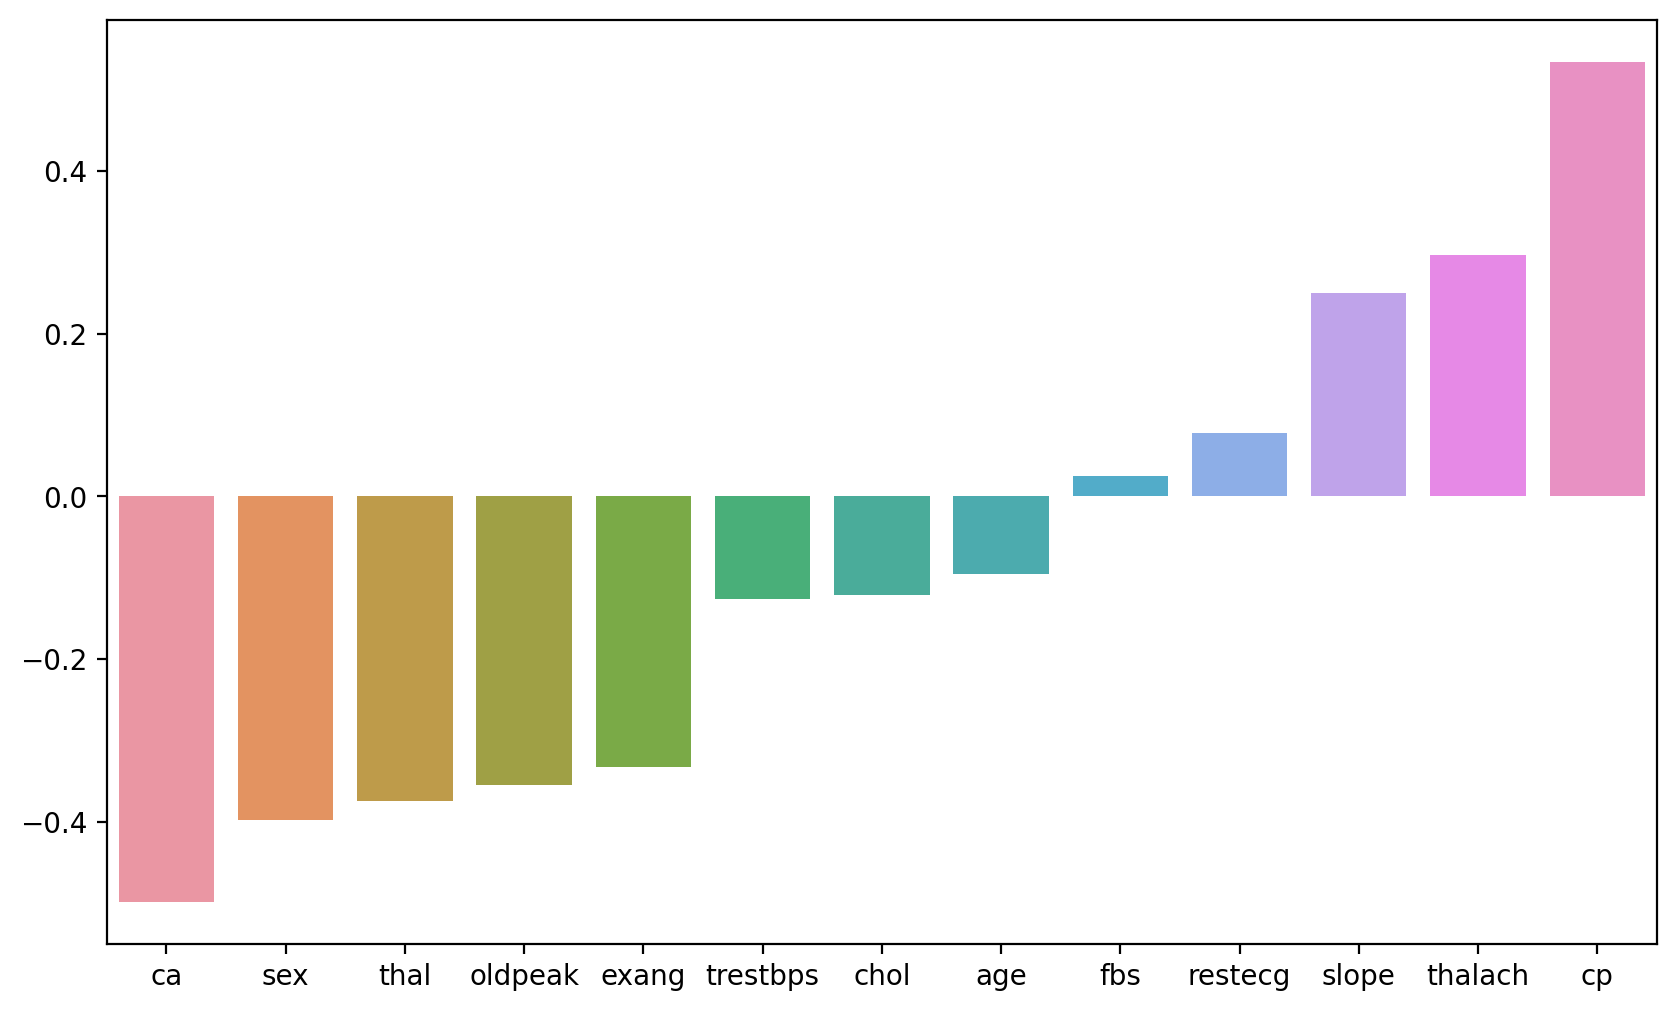

In [60]:
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(x=coefs.index, y=coefs.values)

---------

## Оценка модели

* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [62]:
y_pred = log_model.predict(scaled_X_test)

In [63]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

<Figure size 400x300 with 0 Axes>

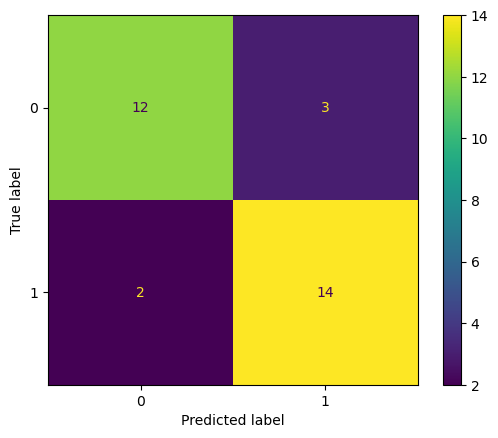

In [64]:
plt.figure(figsize=(4, 3))

cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_model.classes_)
disp.plot()

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [ ]:
# Результаты:
# Для класса 0 (нет заболевания):
# Precision: 0.86
# Recall: 0.80
# F1-score: 0.83
# Для класса 1 (есть заболевание):
# Precision: 0.82
# Recall: 0.88
# F1-score: 0.85
# Общая точность (accuracy): 0.84

### Кривые производительности

графики "precision recall curve" и "ROC Curve"

In [66]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

Text(0.5, 1.0, 'Precision-Recall Curve')

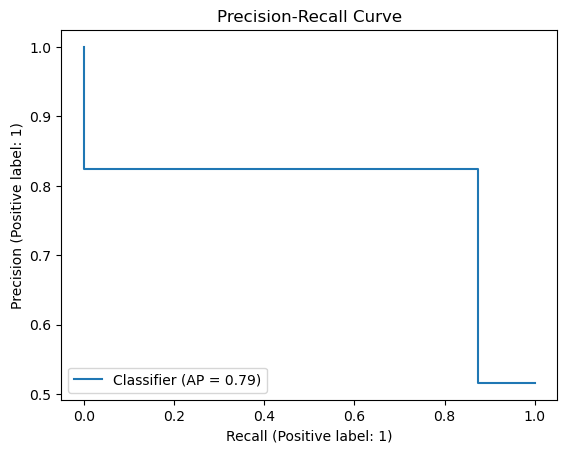

In [67]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.title("Precision-Recall Curve")

Text(0.5, 1.0, 'Precision-Recall Curve from Estimator')

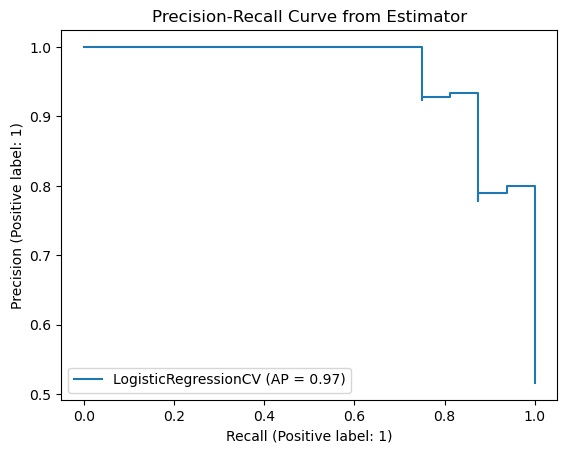

In [68]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)

plt.title("Precision-Recall Curve from Estimator")

In [ ]:
# баланс между точностью и полнотой

Text(0.5, 1.0, 'ROC Curve')

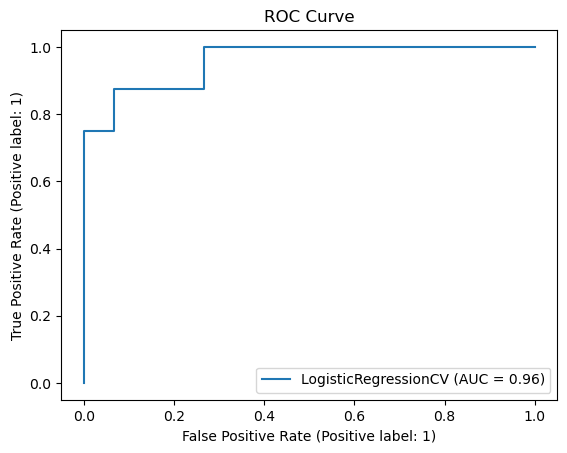

In [69]:
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)
plt.title("ROC Curve")

In [ ]:
# Показывает способность модели разделять классы - чем выше AUC, тем лучше

**Финальное задание: В офис клиники пришёл пациент со следующими значениями признаков:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0
**Правильный ответ должен быть - Нет, человек не болен (т.е. 0)** 

In [70]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [71]:
log_model.predict(scaler.transform(patient))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Верный ответ !!!!!!!!!!!!

In [72]:
log_model.predict_proba(scaler.transform(patient))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.95088082, 0.04911918]])

## Модель на 95% уверена, что у пациента нет заболевания, и на 5% — что заболевание есть

## Учитывая высокую стоимость ложноотрицательных ошибок, стоит рассмотреть корректировку порога классификации для повышения recall для класса 1. Для пациента с указанными характеристиками модель уверенно предсказывает отсутствие заболевания (вероятность 95%).